In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from numpy import asarray
import matplotlib.pyplot as plt


In [2]:
GRAPH_DATA = '../data/hoap2/walk.csv'

RLEG1_JOINT = 0
RLEG2_JOINT = 1
RLEG3_JOINT = 2
RLEG4_JOINT = 3
RLEG5_JOINT = 4
RLEG6_JOINT = 5
RARM1_JOINT = 6
RARM2_JOINT = 7
RARM3_JOINT = 8
RARM4_JOINT = 9

LLEG1_JOINT = 10
LLEG2_JOINT = 11
LLEG3_JOINT = 12
LLEG4_JOINT = 13
LLEG5_JOINT = 14
LLEG6_JOINT = 15
LARM1_JOINT = 16
LARM2_JOINT = 17
LARM3_JOINT = 18
LARM4_JOINT = 19

BODY_JOINT = 20

rleg1_angle = []
rleg2_angle = []
rleg3_angle = []
rleg4_angle = []
rleg5_angle = []
rleg6_angle = []

rarm1_angle = []
rarm2_angle = []
rarm3_angle = []
rarm4_angle = []

lleg1_angle = []
lleg2_angle = []
lleg3_angle = []
lleg4_angle = []
lleg5_angle = []
lleg6_angle = []

larm1_angle = []
larm2_angle = []
larm3_angle = []
larm4_angle = []
body_angle = []


if __name__ == '__main__':
    with open(GRAPH_DATA) as f:
        lines = f.readlines()
        for entry in lines:
            e = entry.split(',')
            rleg1_angle.append(int(e[RLEG1_JOINT]))
            rleg2_angle.append(int(e[RLEG2_JOINT]))
            rleg3_angle.append(int(e[RLEG3_JOINT]))
            rleg4_angle.append(int(e[RLEG4_JOINT]))
            rleg5_angle.append(int(e[RLEG5_JOINT]))
            rleg6_angle.append(int(e[RLEG6_JOINT]))
            
            rarm1_angle.append(int(e[RARM1_JOINT]))
            rarm2_angle.append(int(e[RARM2_JOINT]))
            rarm3_angle.append(int(e[RARM3_JOINT]))
            rarm4_angle.append(int(e[RARM4_JOINT]))

            lleg1_angle.append(int(e[LLEG1_JOINT]))
            lleg2_angle.append(int(e[LLEG2_JOINT]))
            lleg3_angle.append(int(e[LLEG3_JOINT]))
            lleg4_angle.append(int(e[LLEG4_JOINT]))
            lleg5_angle.append(int(e[LLEG5_JOINT]))
            lleg6_angle.append(int(e[LLEG6_JOINT]))
            
            larm1_angle.append(int(e[LARM1_JOINT]))
            larm2_angle.append(int(e[LARM2_JOINT]))
            larm3_angle.append(int(e[LARM3_JOINT]))
            larm4_angle.append(int(e[LARM4_JOINT]))
            body_angle.append(int(e[BODY_JOINT]))
    

In [3]:
    x = asarray([i for i in range(0,len(larm1_angle))])
    y = asarray(larm1_angle)
    
    x = x.reshape((len(x), 1))
    y = y.reshape((len(y), 1))

    scale_x = MinMaxScaler()
    x = scale_x.fit_transform(x)
    scale_y = MinMaxScaler()
    y = scale_y.fit_transform(y)
    print(x.min(), x.max(), y.min(), y.max())

model = Sequential([
    Dense(150, input_shape=(1,)),
    Activation('sigmoid'),
    Dense(50),
    Activation('sigmoid'),
    Dense(25),
    Activation('sigmoid'),
    Dense(1)
])


0.0 1.0 0.0 1.0


In [4]:
  filepath = "models/sine1/larm1/saved-model-{epoch:02d}"
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=50)
  callback_list = [checkpoint]
  model.compile(loss='mse', optimizer='adam')
  model.fit(x, y, epochs=500, batch_size=10, verbose=2, callbacks=callback_list)

Epoch 108/500
1028/1028 - 1s - loss: 4.4125e-04
Epoch 109/500
1028/1028 - 1s - loss: 4.5108e-04
Epoch 110/500
1028/1028 - 1s - loss: 4.7238e-04
Epoch 111/500
1028/1028 - 1s - loss: 4.2962e-04
Epoch 112/500
1028/1028 - 1s - loss: 4.6303e-04
Epoch 113/500
1028/1028 - 1s - loss: 4.0650e-04
Epoch 114/500
1028/1028 - 1s - loss: 4.2341e-04
Epoch 115/500
1028/1028 - 1s - loss: 4.6347e-04
Epoch 116/500
1028/1028 - 1s - loss: 4.2825e-04
Epoch 117/500
1028/1028 - 1s - loss: 3.9296e-04
Epoch 118/500
1028/1028 - 1s - loss: 4.1900e-04
Epoch 119/500
1028/1028 - 1s - loss: 4.2263e-04
Epoch 120/500
1028/1028 - 1s - loss: 4.4878e-04
Epoch 121/500
1028/1028 - 1s - loss: 4.0040e-04
Epoch 122/500
1028/1028 - 1s - loss: 3.8271e-04
Epoch 123/500
1028/1028 - 1s - loss: 3.8452e-04
Epoch 124/500
1028/1028 - 1s - loss: 3.9455e-04
Epoch 125/500
1028/1028 - 1s - loss: 4.2061e-04
Epoch 126/500
1028/1028 - 1s - loss: 3.8924e-04
Epoch 127/500
1028/1028 - 1s - loss: 3.9214e-04
Epoch 128/500
1028/1028 - 1s - loss: 3.8

In [5]:
yhat = model.predict(x)
print(yhat)

[[0.4971961 ]
 [0.49784404]
 [0.49849856]
 ...
 [0.49681386]
 [0.49677956]
 [0.4967452 ]]


In [6]:
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

In [7]:
import math
a = mean_squared_error(y_plot, yhat_plot)
print(math.sqrt(a))

93.36993233368206


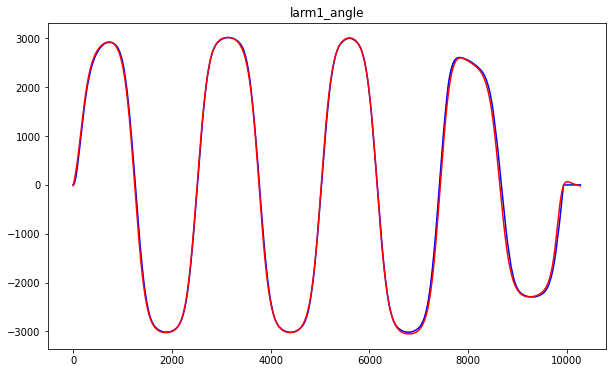

In [8]:

    fig, axs = plt.subplots(1)
    fig.set_size_inches(10, 6, forward=True)    
    axs.plot(larm1_angle, 'b')
    axs.set_title('larm1_angle')
    axs.plot(yhat_plot, 'r')